# **Logestic Regression**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
data.shape

(41188, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

<AxesSubplot:>

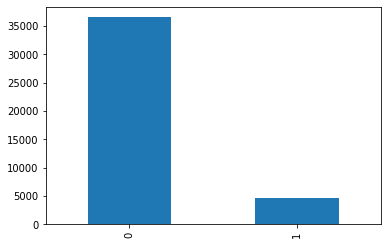

In [7]:
data.y.value_counts().plot(kind = 'bar')

In [8]:
df = pd.get_dummies(data, drop_first = True)

In [9]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


* Since after applying the one hot encoding the columns incraesed from 21 to 54 that is not an huge change
* when compared to rows(41188) 54 columns is very less so we can use one hot encoding
* This will not result to curse of dimensionality so we can use One Hot Encoding

# Logestic Regression

In [11]:
X = df.drop('y', axis = 1)
y = df['y']

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Scaling the data using standard scalar

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

X_test_scaled = scalar.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [17]:
y_pred = log_reg.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.9089584850691915


This is accuracy score if we consider all the features 

## To reduce some features you can use RFE (Recursive Feature Elimination) technique

In [18]:
# Fo that we need to pass only x and y data 

In [19]:
# scaling the data and passing to the RFE

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [20]:
from sklearn.feature_selection import RFE
log_reg = LogisticRegression(max_iter = 200)

rfe = RFE(log_reg, 20)
rfe = rfe.fit(X_scaled, y)
print(rfe.support_)
print(rfe.ranking_)

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[False  True  True  True False  True  True  True  True False  True False
 False False False False False False False False False False False False
 False False False False False  True False  True  True False False False
 False  True  True False False  True  True  True  True False False  True
 False False False  True  True]
[30  1  1  1  8  1  1  1  1 11  1  7 28 24  2  9  6  4 27 29 26 33 10 32
 15 34 16 17 13  1 14  1  1 25 31 23 22  1  1 21  5  1  1  1  1 20 19  1
 18 12  3  1  1]


In [21]:
# In the above True  are those which we need to consider that feature
# rfe.ranking_ gives the ranking to the features (in the code we specified we want top20 features so for 20 features it give 1 rank and remaining based on their ranking)
# so I am just seeing that columns using zip 

cols = []
for i, j in zip(X.columns, rfe.ranking_):
    if j == 1:
        cols.append(i)

In [22]:
cols

['duration',
 'campaign',
 'pdays',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'job_blue-collar',
 'education_university.degree',
 'default_unknown',
 'default_yes',
 'contact_telephone',
 'month_aug',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_nonexistent',
 'poutcome_success']

# Logestic Regression (By taking only importatnt columns)

In [23]:
# Taking the important columns in a new dataset (X_new)
X_new = X[cols]
X_new

,duration,campaign,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,job_blue-collar,education_university.degree,default_unknown,default_yes,contact_telephone,month_aug,month_jun,month_mar,month_may,month_nov,day_of_week_mon,poutcome_nonexistent,poutcome_success
0,210,1,999,1.4,93.444,-36.1,4.963,1,0,1,0,0,1,0,0,0,0,0,1,0
1,138,1,999,-0.1,93.200,-42.0,4.021,0,0,0,0,0,0,0,0,0,1,0,1,0
2,339,3,6,-1.7,94.055,-39.8,0.729,0,1,0,0,0,0,1,0,0,0,0,0,1
3,185,2,999,-1.8,93.075,-47.1,1.405,0,0,0,0,0,0,0,0,0,0,0,1,0
4,137,1,3,-2.9,92.201,-31.4,0.869,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,222,1,999,1.4,94.465,-41.8,4.866,0,0,1,0,1,0,1,0,0,0,0,1,0
41184,196,2,999,1.1,93.994,-36.4,4.860,0,0,1,0,1,0,0,0,1,0,0,1,0
41185,62,3,999,1.1,93.994,-36.4,4.857,0,1,1,0,1,0,0,0,1,0,0,1,0
41186,200,2,999,-3.4,92.431,-26.9,0.742,0,0,0,0,1,0,0,0,0,0,0,1,0


In [26]:
# Scaling the new data (i.e after reduning the features)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_new_scaled = scalar.fit_transform(X_new)

In [27]:
# doing train test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y, test_size = 0.2)

In [29]:
# applying the model
from sklearn.linear_model import LogisticRegression
log_reg_new = LogisticRegression(max_iter = 200)
log_reg_new.fit(X_train_new, y_train_new)

LogisticRegression(max_iter=200)

In [30]:
y_pred_new = log_reg_new.predict(X_test_new)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_new, y_pred_new)
print(score)

0.9090798737557659


* Small reduction or same in the accuracy score even after reducing the some features
* after reducing so much features also we are getting good accuracy score